# DIMENSIONALITY REDUCTION

Dimensionality Reduction is a set of techniques used to reduce the number of features (dimensions) in a dataset while preserving its essential structure. It is useful for:
* Improving visualization: High-dimensional data can be challenging to interpret; reducing dimensions (e.g., to 2D or 3D) helps reveal patterns and clusters.
* Enhancing efficiency: Machine learning models perform faster and require less memory with fewer dimensions.
* Reducing noise: Eliminating redundant or irrelevant features improves model generalization.

Common methods include Principal Component Analysis (PCA) for linear reduction and t-SNE, UMAP, and LLE for non-linear structures. It is widely used in image processing, text analysis, and bioinformatics. See [here](https://scikit-learn.org/stable/modules/manifold.html#t-sne) and [here](https://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html) for more.

Linear algorithms define specific rubrics to choose an “interesting” linear projection of the data. These methods can be powerful, but often miss important non-linear structure in the data. Manifold Learning can be thought of as an attempt to generalize linear frameworks like PCA to be sensitive to non-linear structure in data. Though supervised variants exist, the typical manifold learning problem is unsupervised: it learns the high-dimensional structure of the data from the data itself, without the use of predetermined classifications.

In [1]:
import numpy as np
import scipy.linalg as la
from IPython.display import Image, display
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets, manifold

---

# 1. PRINCIPAL COMPONENT ANALYSIS (PCA)
La Principal Component Analysis (PCA) è una tecnica di riduzione **lineare** della dimensionalità utilizzata per analizzare e semplificare dataset multidimensionali mantenendo il più possibile l'informazione (varianza) contenuta nei dati originali. Agisce riducendo il rumore e/o le variabili ridondanti, riuscendo a visualizzare dataset in 2D o 3D anche quando i dati hanno molte dimensioni. Di fatto quindi trasforma le variabili originali in nuove variabili (*principal component*) che sono indipendenti tra loro. 

Numerically, PCA can be done either by means of *eigendecomposition on the covariance matrix* or via *SVD on the data matrix* (the latter is usually preferred).

Come funziona la PCA?

* Standardizzazione dei dati: Se le variabili hanno scale diverse, la PCA funziona meglio dopo aver standardizzato i dati (ad esempio portando ogni variabile a media 0 e varianza 1). Infatti in the case the features of the datasets have all zero mean, the covariance matrix is of the simpler form: $ {\rm Cov}(X)=\frac{X^TX}{n-1}$
* Calcolo della matrice di covarianza: La matrice di covarianza misura come le variabili sono correlate tra loro. Questo passaggio serve per identificare le direzioni (componenti) di maggiore varianza nei dati.
* Calcolo degli autovalori e autovettori (della matrice di covarianza): Gli autovalori indicano l'importanza di ciascuna direzione (quanta varianza spiega ogni componente). Gli autovettori rappresentano le direzioni principali nello spazio dei dati (i nuovi assi su cui proiettare i dati).
* Ordinamento delle componenti principali: Gli autovalori vengono ordinati in ordine decrescente per scegliere le componenti principali più rilevanti.
* Proiezione dei dati: I dati originali vengono trasformati nello spazio delle componenti principali utilizzando le direzioni degli autovettori.

Nota: La correlazione è una versione normalizzata della covarianza, che ne limita i valori tra −1−1 e +1+1. È data da: $\text{Corr}(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}$

#### SVD for PCA

We saw that SVD is a decomposition of the data matrix $X=UDV^T$ where U and V are orthogonal matrices and D is a diagnonal matrix, (X is our dataset).

Compared with the eigendecomposition of a matrix $A=W\Lambda W^{−1}$, we see that SVD gives us the eigendecomposition of the matrix $X^TX$, which as we have just seen, is basically a scaled version of the covariance for a data matrix with zero mean, with the eigenvectors given by $V^T$ and eigenvalues by $D^2/(n-1)$.

Watch out: for the formula of the covariance above mentioned, $X^TX$ gives us the covariance between the variables (and that's what we want now), instead $XX^T$ gives us the covariance between observations (measurements).

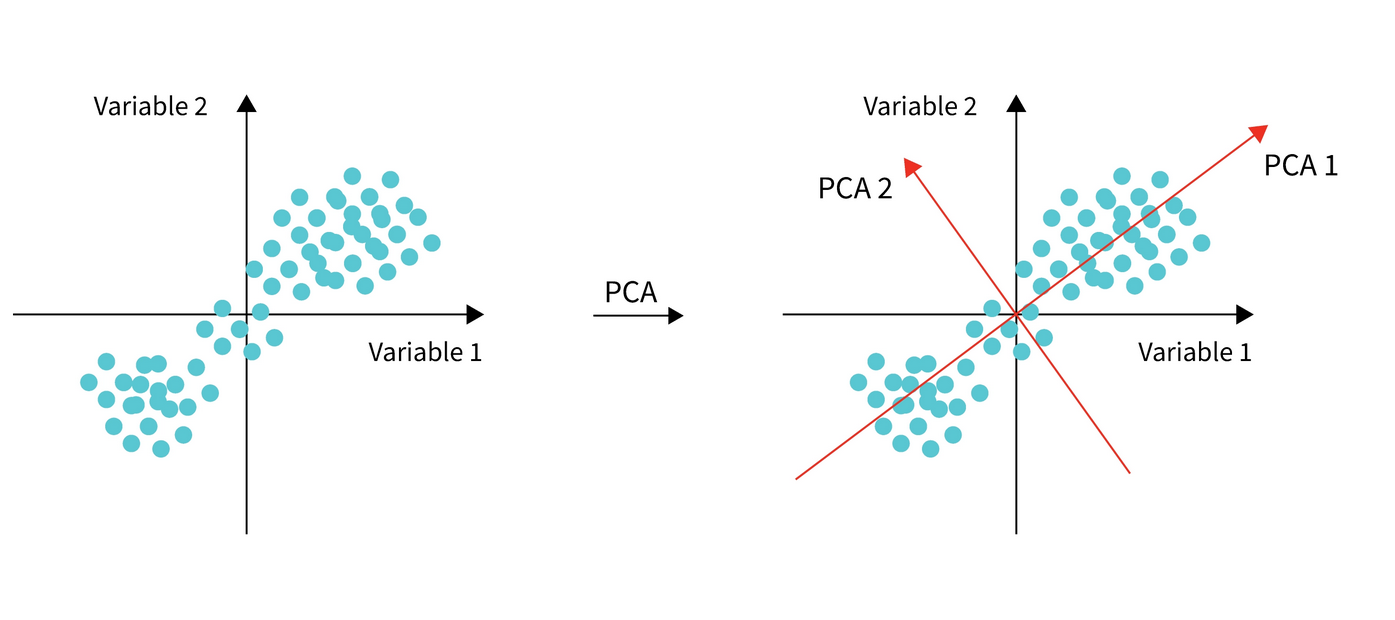

In [22]:
display(Image("./images/pca.png", width=600))

Covariance matrix: 
 [[0.61655556 0.61544444]
 [0.61544444 0.71655556]] 

Autovalori metodo 1: 
 [0.0490834  1.28402771]
Autovettori metodo 1: 
 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]] 

Componenti principali con SVD: 
 [[-0.6778734   0.73517866]
 [-0.73517866 -0.6778734 ]]
Autovalori metodo 2 (ordine decrescente): 
 [1.28402771 0.0490834 ] 

Variability of components in percent:      1 : 96.318%       2 : 3.682% 

Dati proiettati sulla prima componente principale:
 [-0.17511531  0.14285723  0.38437499  0.13041721 -0.20949846  0.17528244
 -0.3498247   0.04641726  0.01776463 -0.16267529]


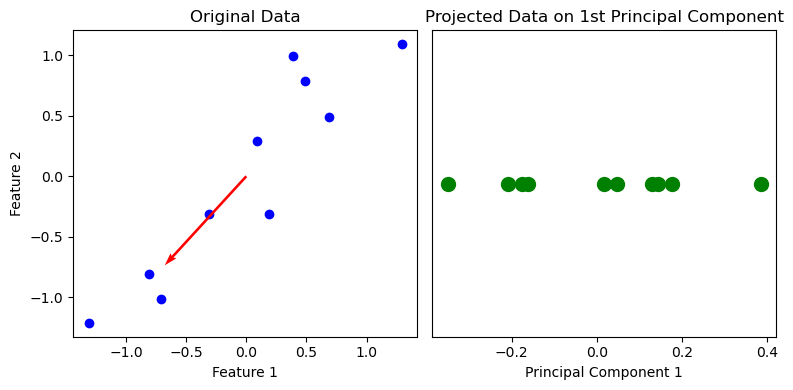

In [20]:
# ESEMPIO UTILE DI PCA:

# Piccolo dataset con due feature
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2.0, 1.6],
              [1.0, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])
# Centro i dati sottraendo la media
X -= np.mean(X, axis=0)

# METODO 1: PCA con autovalori e autovettori della covarianza
# Calcolo la matrice di covarianza
cov_matrix = np.cov(X.T)    # transpose because the covariance of the 2 variables needs to be 2x2
print(f"Covariance matrix: \n {cov_matrix} \n")
# Calcolo autovalori e autovettori
l, v = la.eig(cov_matrix)
l = np.real_if_close(l)   # let's discard the imaginary part due to calculations
print(f"Autovalori metodo 1: \n {l}")
print(f"Autovettori metodo 1: \n {v} \n")

# METODO 2: PCA con SVD
# Applico SVD direttamente ai dati centrati
U, S, Vt = la.svd(X)
print(f"Componenti principali con SVD: \n {Vt.T}")   # Vt ha le righe come componenti principali, quindi trasponiamo
avl = S**2 / (len(X) - 1)  # I valori singolari al quadrato divisi per (n-1) danno gli autovalori
print(f"Autovalori metodo 2 (ordine decrescente): \n {avl} \n")

# NOTA: so che gli autovalori sembrano diversi, ma dipende dalla normalizzazione fatta e dall'ordine in cui li mette

# the variability explained by each component is the fraction of tha eigenvalue over the total:
tot_avl = avl[0]+avl[1]
print(f"Variability of components in percent:      1 : {avl[0]/tot_avl*100:.3f}%       2 : {avl[1]/tot_avl*100:.3f}% \n")

# DIMENSIONALITY REDUCTION:
# assumiamo ora che ci bastano le informazioni portate dalla prima principal component, come ridefinisco il dataset iniziale?
    # devo proiettare il dataset sulla matrice data dagli autovettori delle componenti principali scelte! (nel nostro caso una sola)
proj_matrix = v[:, 0]  # La prima colonna rappresenta la prima componente principale
# Proietto i dati centrati sulla prima componente principale
new_X = X.dot(proj_matrix)

# X_projected è il dataset ridotto alla prima componente principale
print(f"Dati proiettati sulla prima componente principale:\n {new_X}")



# PLOT dei dati originali e poi proiettati sulla prima componente principale:
plt.figure(figsize=(8, 4))

# Dati originali
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='blue')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Aggiungo il vettore della prima componente principale
plt.quiver(0, 0, v[0, 1], v[1, 1], angles='xy', scale_units='xy', scale=1, color='red', label='First Principal Component')

# 2. Visualizza i dati proiettati sulla prima componente principale
plt.subplot(1, 2, 2)
plt.scatter(new_X, np.zeros_like(new_X), color='green', s=100)
plt.title('Projected Data on 1st Principal Component')
plt.xlabel('Principal Component 1')
plt.yticks([])  # Rimuovi le etichette dell'asse y, in quanto ora è ridotto a una dimensione

plt.tight_layout()
plt.show()

As we can see the red arrow (= the first principal component) points toward the direction of maximum variability of the dataset.

### PCA CON LA LIBRERIA DI SCI-KIT LEARN
We can do the same things but easier using the library in `from sklearn.decomposition import PCA`. Remember to center your data points at mean 0. The syntax is:

`PCA(n_components=None, whiten=False, svd_solver='auto', random_state=None)`

The options are:
* *n_components*: specifica il numero di componenti principali da mantenere. Se è un numero intero, indica quante componenti restituire. Se è un valore frazionario (compreso tra 0 e 1), rappresenta la percentuale della varianza totale che deve essere conservata. Se è None, vengono restituite tutte le componenti (uguale al numero di caratteristiche originali).
* *whiten*: se impostato su True, i dati proiettati vengono normalizzati (le componenti principali sono scalate in modo che abbiano una varianza unitaria). È utile quando si vogliono dati con varianza uniforme tra tutte le componenti principali.
* *svd_solver*: determina l'algoritmo da usare per la decomposizione: 'auto': scegliere automaticamente l'algoritmo in base alla dimensione del problema. 'full': utilizza una decomposizione completa di SVD. 'arpack': usa un approccio approssimato con il metodo ARPACK. 'randomized': usa una versione approssimata di SVD più veloce.
* *random_state*: fissa un seme per la randomizzazione se si usa l'algoritmo randomized.

The methods are:
* `fit(X)`: calcola la PCA sui dati X (determina le componenti principali).
* `transform(X)`: trasforma nuovi dati X nello spazio delle componenti principali, dopo aver adattato il modello con fit().
* `fit_transform(X)`: adatta il modello e poi trasforma i dati X proiettandoli sulle componenti principali.
* `explained_variance_ratio_`: attributo che fornisce la percentuale di varianza spiegata da ciascuna delle componenti principali. È utile per capire l'importanza relativa di ciascuna componente.
* `components_`: attributo che contiene le componenti principali, cioè i vettori direzionali lungo i quali i dati sono proiettati. Le righe di components_ sono le componenti principali (le colonne sono le dimensioni originali dei dati).
* `mean_`: attributo che contiene la media dei dati originali, utilizzata per centrare i dati (sottraendo la media da ciascun dato prima di applicare la PCA). IMPORTANT

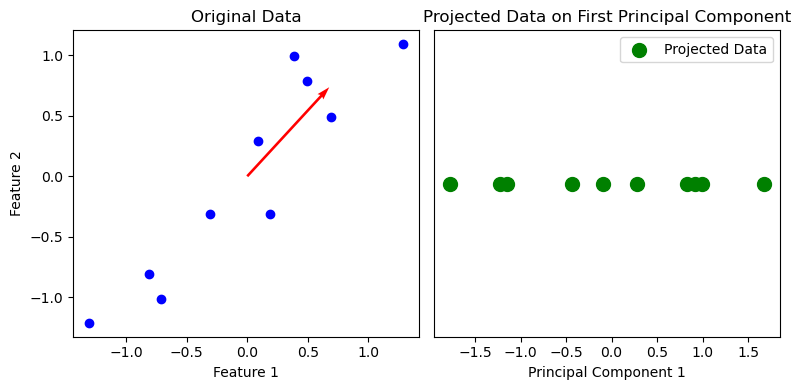

Variance explained by the first principal component: 96.318%


In [21]:
from sklearn.decomposition import PCA

# Piccolo dataset con due feature
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2.0, 1.6],
              [1.0, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])
# Centro i dati sottraendo la media
X -= np.mean(X, axis=0)

# Eseguo la PCA usando Scikit-learn
pca = PCA(n_components=1)  # Riduciamo a 1 componente principale
X_reduced = pca.fit_transform(X)  # Eseguiamo la trasformazione PCA e proiettiamo sulle PC

# Visualizzazione dei dati prima e dopo la riduzione dimensionale:
plt.figure(figsize=(8, 4))

# Dati originali
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Aggiungi il vettore della prima componente principale (direzione)
plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=1, color='red', label='First Principal Component')

# 2. Visualizza i dati proiettati sulla prima componente principale
plt.subplot(1, 2, 2)
plt.scatter(X_reduced, np.zeros_like(X_reduced), color='green', label='Projected Data', s=100)
plt.title('Projected Data on First Principal Component')
plt.xlabel('Principal Component 1')
plt.yticks([])  # Rimuovi le etichette dell'asse y, in quanto ora è ridotto a una dimensione

plt.tight_layout()
plt.legend()
plt.show()

# Mostra la variabilità spiegata dalla componente principale
explained_variance = pca.explained_variance_ratio_[0] * 100  # Percentuale di varianza spiegata dalla prima componente
print(f"Variance explained by the first principal component: {explained_variance:.3f}%")



---

# 2. t-STOCHASTIC NEIGHBOR EMBEDDING (t-SNE)
Il t-SNE (t-Distributed Stochastic Neighbor Embedding) è una tecnica di riduzione della dimensionalità **non lineare**, utilizzata principalmente per la visualizzazione di dati ad alta dimensione in 2D o 3D. While Isomap, LLE and variants are best suited to unfold a single continuous low dimensional manifold, t-SNE will focus on the local structure of the data and will tend to extract clustered local groups of samples. See [here](https://distill.pub/2016/misread-tsne/) for more practical info and very useful visualization in t-SNE.

Funziona tramite il calcolo delle probabilità di vicinanza: nello spazio originale, la similarità tra due punti viene modellata come una probabilità basata su una distribuzione gaussiana; nello spazio ridotto (2D o 3D), viene usata una distribuzione t-Student per modellare le relazioni tra i punti. This allows t-SNE to be particularly sensitive to local structure and has a few other **advantages** over existing techniques:
* Revealing the structure at many scales on a single map
* Revealing data that lie in multiple, different, manifolds or clusters
* Reducing the tendency to crowd points together at the center

Il t-SNE cerca di preservare la struttura locale minimizzando la differenza tra le distribuzioni di probabilità (divergenza Kullback-Leibler KL) nei due spazi. E lo fa minimizzando il gradient descent. Note that the KL divergence is not convex, i.e. multiple restarts with different initializations will end up in local minima of the KL divergence. Hence, it is sometimes useful to try different seeds and select the embedding with the lowest KL divergence.

The **disadvantages** to using t-SNE are roughly:
* t-SNE is computationally expensive, and can take several hours on million-sample datasets where PCA will finish in seconds or minutes
* The Barnes-Hut t-SNE method is limited to two or three dimensional embeddings.
* The algorithm is stochastic and multiple restarts with different seeds can yield different embeddings. However, it is perfectly legitimate to pick the embedding with the least error.
* Global structure is not explicitly preserved. This problem is mitigated by initializing points with PCA (using init='pca').

Tips on practical use:
* Make sure the same scale is used over all features. Because manifold learning methods are based on a nearest-neighbor search, the algorithm may perform poorly otherwise.
* Note that noisy data can “short-circuit” the manifold, in essence acting as a bridge between parts of the manifold that would otherwise be well-separated

#### PROCEDIMENTO MATEMATICO
L'idea è trasformare le distanze tra punti in probabilità di vicinanza. Viene usata la distribuzione normale perché modella bene la densità locale dei dati. Per due punti $x_i$​ e $x_j$ nello spazio originale, definiamo la probabilità condizionale di vicinanza:
$$ p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)} $$
dove $\sigma_i$ è la deviazione standard di una Gaussiana centrata su $x_i$​. We can interpret $p_{j|i}$ as the likelihood that $x_j$ is $x_i$'s neighbor. So we take $p_{i|i}=0$.

Preso $N$ come il numero totale di punti, la probabilità simmetrica viene calcolata come:
$$ p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N} $$

Ora vogliamo trovare una rappresentazione $y_i$​ in uno spazio a dimensione inferiore che preservi le relazioni di vicinanza. Definiamo una nuova probabilità di vicinanza tra punti $y_i$​ e $y_j$​ usando una distribuzione t-Student con 1 grado di libertà (distribuzione di Cauchy). La t-Student ha code più pesanti, permettendo di separare meglio i cluster e preservare strutture locali:
$$ q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}} $$

L’obiettivo è far sì che le probabilità $q_{ij}$​ nello spazio ridotto siano il più simili possibile a quelle $p_{ij}$​ nello spazio originale. Misuriamo questa differenza usando la divergenza di Kullback-Leibler (KL):

$$ C = D_{KL}(p||q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}} $$

Questa funzione di costo penalizza le differenze tra le due distribuzioni:
* Se $p_{ij}$ è grande e $q_{ij}$​ è piccolo → la penalità è alta (punti vicini nello spazio originale ma lontani nella proiezione).
* Se $p_{ij}$​ è piccolo e $q_{ij}$ è grande → la penalità è più bassa (permette una certa distorsione globale).

L'algoritmo usa il **gradient descent** per aggiornare le coordinate $y_i$ e minimizzare questa funzione di costo.

#### PERPLEXITY E SCELTA DI $\sigma$
Per la scelta ottimale dei $\sigma_i$ da utilizzare, si introduce un parametro detto **perplexity** $\Sigma$. È un valore scelto dall'utente che controlla il bilanciamento tra l'attenzione ai vicini più prossimi e la struttura globale. È definita come:

$$ \Sigma = 2^{H_i} $$

dove $H_i$ è l'entropia di Shannon di $p_{j|i}$:  $ H_i = -\sum_{j} p_{j|i} \log_2 p_{j|i} $. 

Intuitivamente:
* Bassa Perplexity → La Gaussiana è più stretta, focalizzandosi solo sui vicini più prossimi.
* Alta Perplexity → La Gaussiana è più larga, includendo più punti lontani nella distribuzione.

Dato un valore fissato di perplexity $\Sigma$, vogliamo trovare il valore di $\sigma_i$​ tale che l'entropia $H_i$ soddisfi la condizione esponenziale di cui sopra. Dal momento che $H_i$​ dipende da $\sigma_i$​​ in modo non lineare, non possiamo risolvere questa equazione direttamente. Invece, si usa una ricerca binaria su $\sigma_i$​​ per trovare il valore che soddisfa:
$$ H_i(\sigma_i) \approx \log_2(\Sigma) $$

L'algoritmo è:
1. Si inizializza $ \sigma_i $ con un valore arbitrario.
2. Si calcola $ H_i(\sigma_i) $.
3. Se $ H_i > \log_2(\Sigma) $, si riduce $ \sigma_i $.
4. Se $ H_i < \log_2(\Sigma) $, si aumenta $ \sigma_i $.
5. Si ripete fino a convergenza.

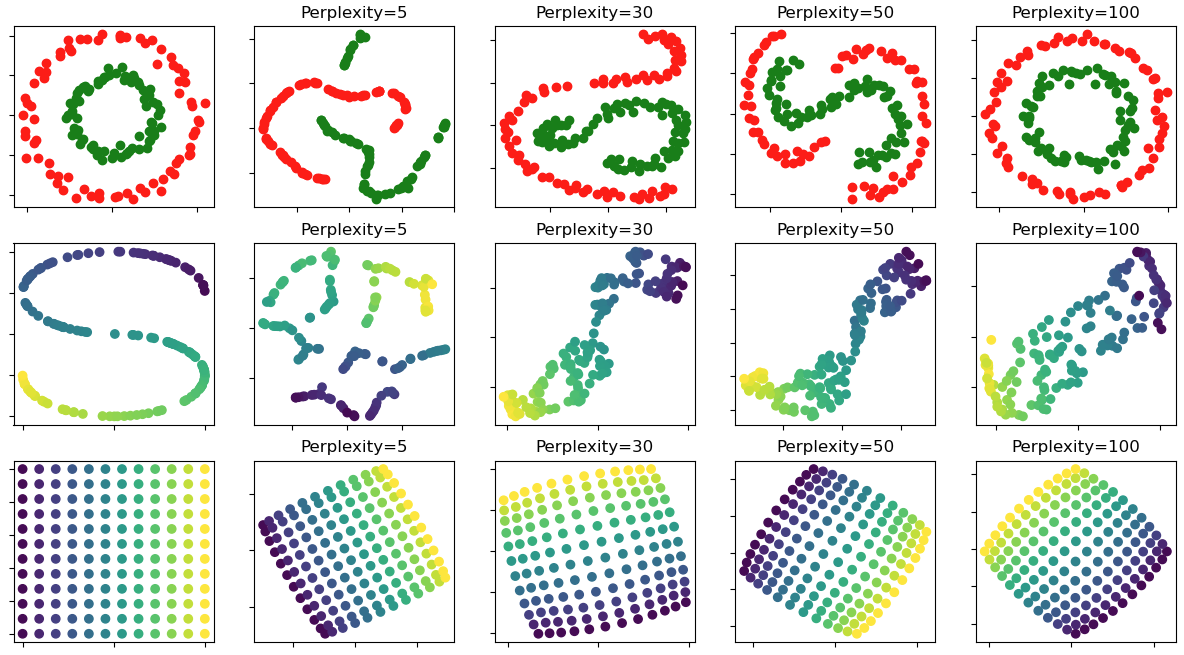

In [22]:
display(Image("./images/t_sne_perplexity.png", width=900))

Let's see an example:

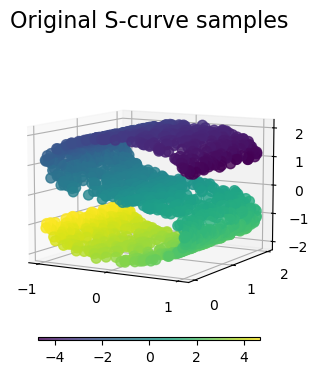

In [23]:
from matplotlib import ticker
from sklearn import datasets, manifold

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)


def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(4,4),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


plot_3d(S_points, S_color, "Original S-curve samples")

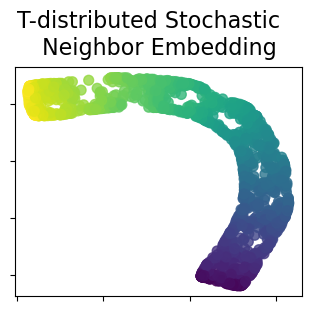

In [17]:

t_sne = manifold.TSNE(
    n_components=n_components,
    perplexity=30,
    init="random",
    max_iter=250,
    random_state=0,
)
S_t_sne = t_sne.fit_transform(S_points)

plot_2d(S_t_sne, S_color, "T-SNE")